#Projeto: Análise Exploratória de Dados de Câncer

##02 - Projeto - Exploração inicial

Objetivo
Na segunda etapa do projeto, vocês efetuarão uma análise exploratória inicial
dos dados.


Tarefas
1. Criar um Jupyter Notebook para iniciar a exploração dos conjuntos de
dados
2. No notebook, calcular medidas de centralidade e dispersão das variáveis
disponíveis
3. No notebook, criar boxplots para as variáveis disponíveis
Entrega
O notebook deve ser acrescentado ao repositório do GitHub do projeto.

Grupo:

Adriel Ferreira

Jéssica Nagahama

Kamily Assis


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

**DNS** = "*Deaths for Neoplasms for both Sex*" (Mortes por câncer para ambos os sexos)


In [16]:
df = pd.read_csv('/content/cancer-death-rates-by-age.csv')

In [19]:
df = df.rename(columns={ "Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate)": "| DNS < 5 |",
                "Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)": "DNS Padronizado",
                "Deaths - Neoplasms - Sex: Both - Age: All Ages (Rate)": "| DNS all ages |",
                "Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate)" : "DNS > 70",
                "Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate)" : "| 5 < DNS < 14 |",
                "Deaths - Neoplasms - Sex: Both - Age: 50-69 years (Rate)" : "50 < DNS < 69",
                "Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Rate)" : "| 15 < DNS < 49 |" })

In [5]:
df.head().style.set_table_styles([dict(selector='th', props=[('text-align', 'center')]),
                                    dict(selector='td', props=[('text-align', 'center')])])

,Entity,Code,Year,| DNS < 5 |,DNS Padronizado,| DNS all ages |,DNS > 70,| 5 < DNS < 14 |,50 < DNS < 69,| 15 < DNS < 49 |
0,Afghanistan,AFG,1990,21.333432,159.964864,101.409895,1021.494249,9.372839,407.233106,43.620659
1,Afghanistan,AFG,1991,18.701225,158.455892,93.714269,1013.760277,9.456989,404.506587,40.530804
2,Afghanistan,AFG,1992,16.801217,157.390960,84.011048,1007.834265,9.737245,402.687908,37.166581
3,Afghanistan,AFG,1993,16.527773,157.574448,79.038807,1006.565188,9.832934,404.419442,35.723897
4,Afghanistan,AFG,1994,16.527686,158.031726,77.173172,1006.363704,9.564733,407.332265,35.458716


##Média, Mediana e Moda

In [ ]:
import scipy.stats as stats
#iterando colunas
for col in df.columns[3:]:
  #checando se as colunas contém valores númericos
  if df[col].dtype != 'object':
    mean = df[col].mean()
    median = df[col].median()
    mode = stats.mode(df[col], keepdims=True)[0][0]
  
    print(f"{col}\n Média: {mean}\n Mediana: {median}\n Moda: {mode}\n")

| DNS < 5 |
 Média: 7.651147972454096
 Mediana: 6.224456323399101
 Moda: 1.3442981586974443

DNS Padronizado
 Média: 134.5581036884511
 Mediana: 132.7171445034445
 Moda: 64.21483068037446

| DNS all ages |
 Média: 124.64554041182502
 Mediana: 87.57825304562368
 Moda: 25.11404569910353

DNS > 70
 Média: 1052.8084302794675
 Mediana: 1002.5292612725623
 Moda: 475.5543507082096

| 5 < DNS < 14 |
 Média: 4.6432470404065365
 Mediana: 4.312098954549823
 Moda: 1.0088495035066494

50 < DNS < 69
 Média: 326.398140285639
 Mediana: 311.3734507849955
 Moda: 112.1846716091253

| 15 < DNS < 49 |
 Média: 29.2605844078349
 Mediana: 27.606473843690452
 Moda: 9.666456208846052



##Variância e Desvio Padrão

In [ ]:
for col in df.columns[3:]:
  if df[col].dtype != 'object':
    variance = df[col].var()
    std_dev = df[col].std()

    print(f"{col}\n Variância: {variance}\n Desvio Padrão: {std_dev}\n")

| DNS < 5 |
 Variância: 31.106437529360665
 Desvio Padrão: 5.577314544595873

DNS Padronizado
 Variância: 1213.0375396275608
 Desvio Padrão: 34.82868845689658

| DNS all ages |
 Variância: 7801.529772632506
 Desvio Padrão: 88.3262688707754

DNS > 70
 Variância: 109327.31298103016
 Desvio Padrão: 330.6468100269987

| 5 < DNS < 14 |
 Variância: 2.7850912090373354
 Desvio Padrão: 1.6688592538130156

50 < DNS < 69
 Variância: 10258.410987951076
 Desvio Padrão: 101.28381404721623

| 15 < DNS < 49 |
 Variância: 104.78625783787832
 Desvio Padrão: 10.236515903268959



##Boxplots

Boxplots criados utilizando algumas variáveis do dataset.

Text(0.5, 1.0, 'Taxa de mortalidade (pessoas de 15 à 49 anos) em 1990 e 2010')

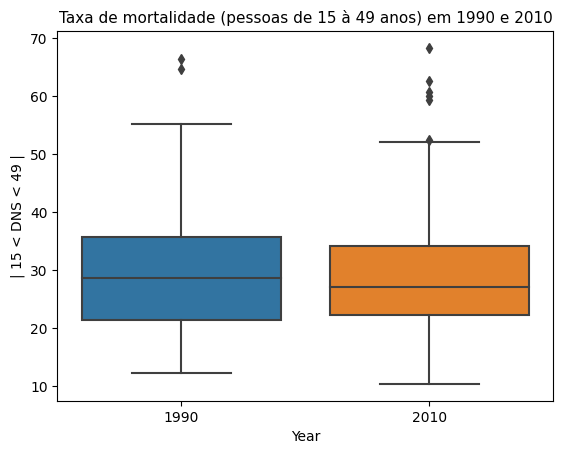

In [ ]:
df_filtered = df.loc[((df['Year'] == 1990) | (df['Year'] == 2010))]
sns.boxplot(data=df_filtered,x='Year',y='| 15 < DNS < 49 |')
plt.title('Taxa de mortalidade (pessoas de 15 à 49 anos) em 1990 e 2010',fontsize=11)

Text(0.5, 1.0, 'Taxa de mortalidade (pessoas de todas as idades) dos países do BRICS')

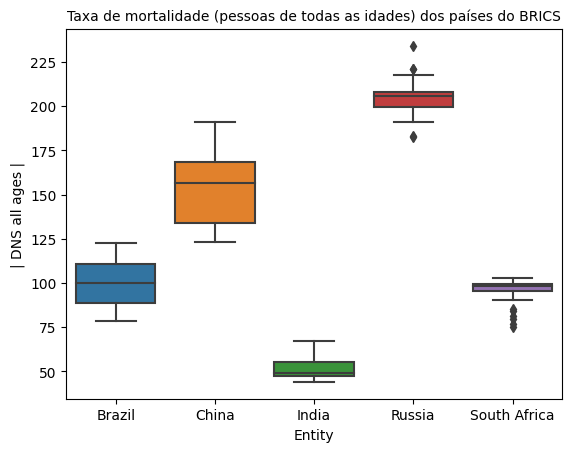

In [6]:
df_filtered_brics = df.loc[((df['Entity'] == 'Brazil') | (df['Entity'] == 'Russia' ) | (df['Entity'] == 'India') | (df['Entity'] == 'China') | (df['Entity'] == 'South Africa'))]
sns.boxplot(data=df_filtered_brics , x='Entity', y='| DNS all ages |')
plt.title('Taxa de mortalidade (pessoas de todas as idades) dos países do BRICS',fontsize=10)

Text(0.5, 1.0, 'Taxa de mortalidade (todas as idades) - Ucrânia e Rússia')

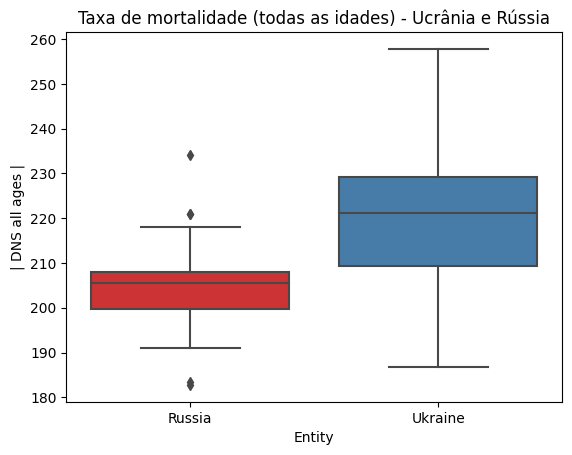

In [7]:
df_filtered_ukr = df.loc[(df['Entity']=='Ukraine')|(df['Entity'] == 'Russia')]
sns.boxplot(data=df_filtered_ukr , x='Entity', y='| DNS all ages |',palette="Set1")
plt.title('Taxa de mortalidade (todas as idades) - Ucrânia e Rússia')

## Gráficos

Gráficos
 criados utilizando algumas variáveis do dataset.

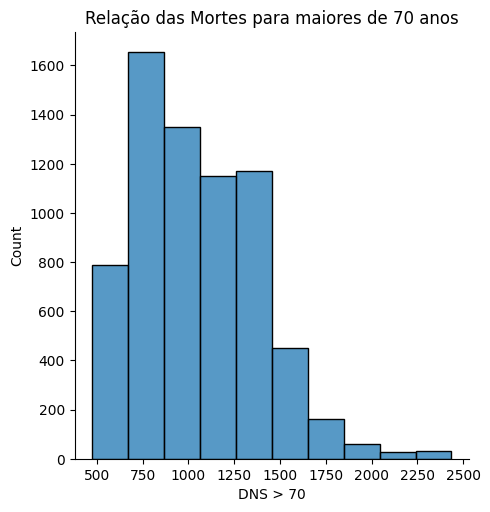

In [ ]:
#Gráfico de barra
sns.displot(data=df, x='DNS > 70', bins=10).set(title="Relação das Mortes para maiores de 70 anos")

In [ ]:
# calcular a mediana de DNS all ages para cada país
medians = df.groupby('Entity')['| DNS all ages |'].median().sort_values()

print(medians)


Entity
Niger            29.411725
Qatar            31.785496
Oman             32.282991
Saudi Arabia     32.288943
Kuwait           34.171910
                   ...    
Germany         311.065990
Denmark         311.148366
Scotland        321.408145
Hungary         347.557702
Monaco          597.629612
Name: | DNS all ages |, Length: 228, dtype: float64


[Text(0.5, 1.0, 'Relação de Mortes em todas as idades de 1990 a 2000')]

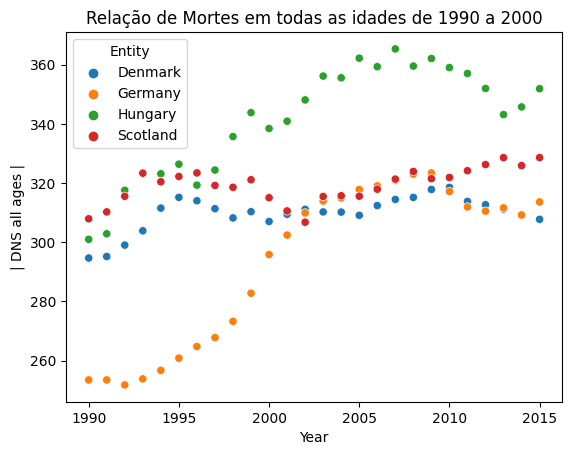

In [8]:
#Gráfico de dispersão

year_country_cut = df.loc[(df['Year'] <= 2015) & ((df['Entity'] == 'Hungary') | (df['Entity'] == 'Scotland') | (df['Entity'] == 'Denmark')| (df['Entity'] == 'Germany'))]

sns.scatterplot(data=year_country_cut, x='Year', y='| DNS all ages |',hue='Entity').set(title="Relação de Mortes em todas as idades de 1990 a 2000")


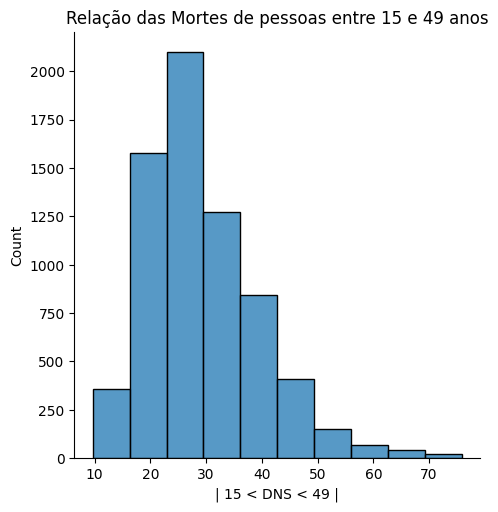

In [ ]:
#Gráfico de barra
sns.displot(data=df, x='| 15 < DNS < 49 |', bins=10).set(title="Relação das Mortes de pessoas entre 15 e 49 anos")

[Text(0.5, 1.0, 'Relação de Mortes de individuos de até 5 anos de 1990 a 2010')]

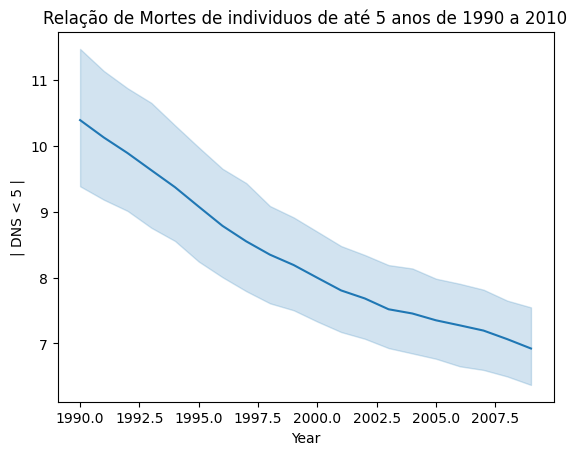

In [ ]:
#Gráfico de linhas
year_cut = df[df['Year'] < 2010]

sns.lineplot(data=year_cut, x='Year', y='| DNS < 5 |').set(title="Relação de Mortes de individuos de até 5 anos de 1990 a 2010")

## K-means

In [10]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


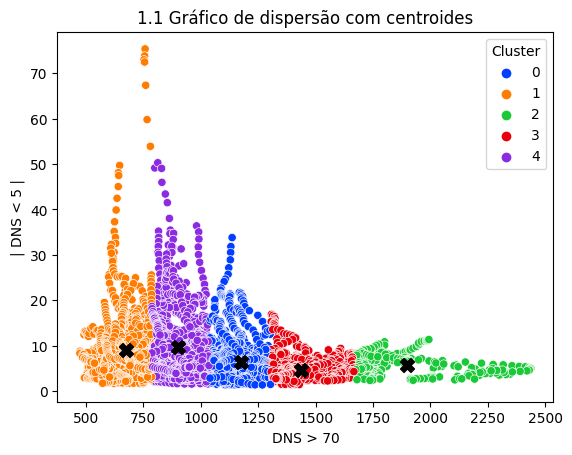

In [39]:
menos5_mais70 = df[['DNS > 70', '| DNS < 5 |']]

# Definir o número de clusters
k = 5

# Executar o algoritmo K-Means
kmeans = KMeans(n_clusters=k)
kmeans.fit(menos5_mais70)
centroides = kmeans.cluster_centers_

# Adicionar as colunas de cluster ao DataFrame original
df['Cluster'] = kmeans.labels_

# Visualizar os resultados do cluster
sns.scatterplot(data=df, x='DNS > 70', y='| DNS < 5 |', hue='Cluster', palette='bright')

# Plotar os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], marker='X', color='black', s=100)

# Configurações adicionais do gráfico
plt.xlabel('DNS > 70')
plt.ylabel('| DNS < 5 |')
plt.title('1.1 Gráfico de dispersão com centroides')

# Exibir o gráfico
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


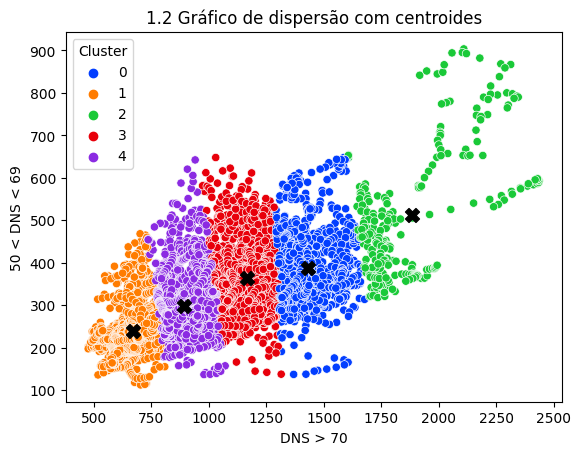

In [40]:
de_50_a_mais70 = df[['DNS > 70', '50 < DNS < 69']]

# Definir o número de clusters
k = 5

# Executar o algoritmo K-Means
kmeans = KMeans(n_clusters=k)
kmeans.fit(de_50_a_mais70)
centroides = kmeans.cluster_centers_

# Adicionar as colunas de cluster ao DataFrame original
df['Cluster'] = kmeans.labels_

# Visualizar os resultados do cluster
sns.scatterplot(data=df, x='DNS > 70', y='50 < DNS < 69', hue='Cluster', palette='bright')

# Plotar os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], marker='X', color='black', s=100)

# Configurações adicionais do gráfico
plt.xlabel('DNS > 70')
plt.ylabel('50 < DNS < 69')
plt.title('1.2 Gráfico de dispersão com centroides')

# Exibir o gráfico
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


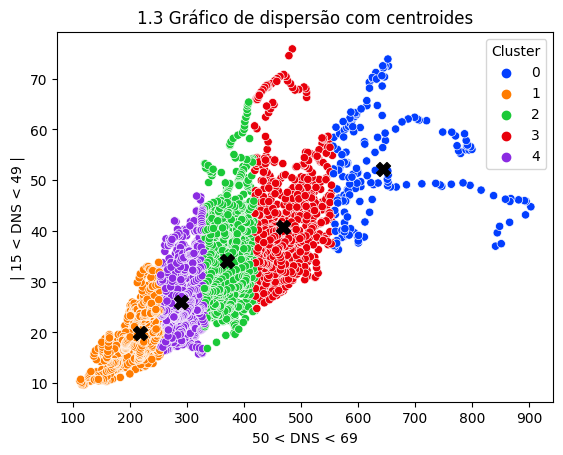

In [41]:
entre50_69_entre15_49 = df[['50 < DNS < 69', '| 15 < DNS < 49 |']]

# Definir o número de clusters
k = 5
# Executar o algoritmo K-Means
kmeans = KMeans(n_clusters=k)
kmeans.fit(entre50_69_entre15_49)
centroides = kmeans.cluster_centers_

# Adicionar as colunas de cluster ao DataFrame original
df['Cluster'] = kmeans.labels_

# Visualizar os resultados do cluster
sns.scatterplot(data=df, x='50 < DNS < 69', y='| 15 < DNS < 49 |', hue='Cluster', palette='bright')

# Plotar os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], marker='X', color='black', s=100)

# Configurações adicionais do gráfico
plt.xlabel('50 < DNS < 69')
plt.ylabel('| 15 < DNS < 49 |')
plt.title('1.3 Gráfico de dispersão com centroides')

# Exibir o gráfico
plt.show()


## Conclusões

- As incidências de mortes nos intervalos de idades 'entre 50 e 69' e 'maior que 70' são mais próximas que 'entre 15 e 49' e 'entre 50 e 69';
- No gráfico 1.1 vemos uma incidência muito maior de morte em pessoas com mais de 70 anos do que crianças menores que 5 anos.
